# Rewriting rules in ReGraph

In the context of ReGraph, by rewriting rules we mean the rules of _sesqui-pushout rewriting_ (see more details [here](https://link.springer.com/chapter/10.1007/11841883_4)). A rewriting rule consists of the three graphs: $p$ – preserved part, $lhs$ – left hand side, $rhs$ – right hand side, and two mappings: from $p$ to $lhs$ and from $p$ to $rhs$.

Informally, $lhs$ represents a pattern to match in a graph, subject to rewriting. $p$ together with $p \rightarrow lhs$ mapping specifies a part of the pattern which stays preseved during rewriting, i.e. all the nodes/edges/attributes present in $lhs$ but not $p$ will be removed. $rhs$ and $p \rightarrow rhs$ specify nodes/edges/attributes to add to the $p$. In addition, rules defined is such a way allow to clone and merge nodes. If two nodes from $p$ map to the same node in $lhs$, the node corresponding to this node of the pattern will be cloned. Symmetrically, if two nodes from $p$ map to the same node in $rhs$, the corresponding two nodes will be merged.

The following examples will illustrate the idea behind the sesqui-pushout rewriting rules more clearly:


In [1]:
from regraph import NXGraph, Rule, plot_rule

### 1. Creating a rewriting rule from a pattern and injecting transformations

/home/eugenia/anaconda3/envs/kami/lib/python3.7/site-packages/matplotlib-3.0.3-py3.7-linux-x86_64.egg/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


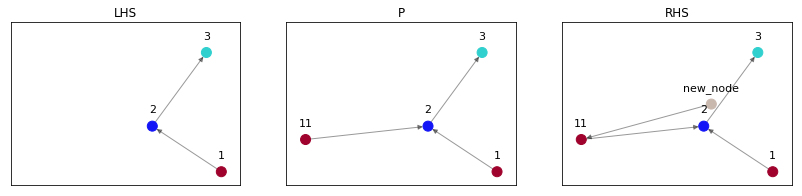

In [2]:
# Define the left-hand side of the rule
pattern = NXGraph()
pattern.add_nodes_from([1, 2, 3])
pattern.add_edges_from([(1, 2), (2, 3)])

rule1 = Rule.from_transform(pattern)
# `inject_clone_node` returns the IDs of the newly created
# clone in P and RHS
p_clone, rhs_clone = rule1.inject_clone_node(1)
rule1.inject_add_node("new_node")
rule1.inject_add_edge("new_node", rhs_clone)

plot_rule(rule1)

Every rule can be converted to a sequence of human-readable commands,

In [3]:
print(rule1.to_commands())

CLONE 1 AS 11.
ADD_NODE new_node {}.
ADD_EDGE new_node 11 {}.



### 2. Creating a rewriting rule from $lhs$, $p$, $rhs$ and two maps

By default, `Rule` objects in ReGraph are initialized with three graph objects (`NXGraph`) corresponding to $p$, $lhs$ and $rhs$, together with two Python dictionaries encoding the homomorphisms $p \rightarrow lhs$ and $p \rightarrow rhs$. This may be useful in a lot of different scenarios. For instance, as in the following example.

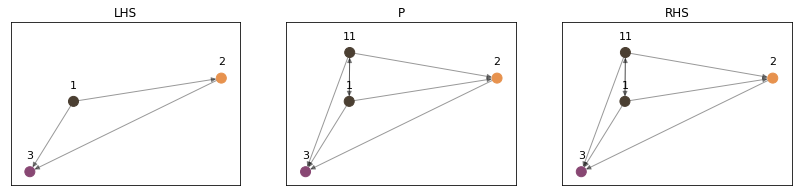

New node corresponding to the clone:  11
[(1, 2), (1, 3), (1, 1), (1, '11'), (2, 3), ('11', 3), ('11', 1), ('11', 2), ('11', '11')]


In [4]:
# Define the left-hand side of the rule
pattern = NXGraph()
pattern.add_nodes_from([1, 2, 3])
pattern.add_edges_from([(1, 2), (1, 3), (1, 1), (2, 3)])

# Define the preserved part of the rule
rule2 = Rule.from_transform(pattern)
p_clone, rhs_clone = rule2.inject_clone_node(1)

plot_rule(rule2)

print("New node corresponding to the clone: ", p_clone)
print(rule2.p.edges())

As the result of cloning of the node `1`, all its incident edges are copied to the newly created clone node (variable `p_clone`). However, in our rule we would like to keep only some of the edges and remove the rest as follows.

[(1, 2), (1, '11'), (2, 3), ('11', 3)]


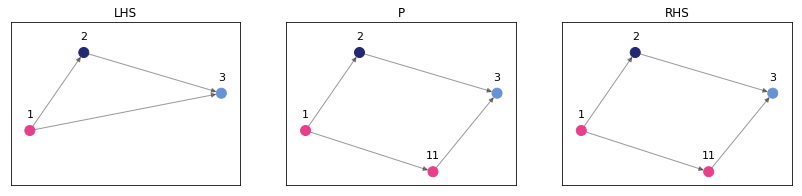

In [5]:
rule2.inject_remove_edge(1, 1)
rule2.inject_remove_edge(p_clone, p_clone)
rule2.inject_remove_edge(p_clone, 1)
rule2.inject_remove_edge(p_clone, 2)
rule2.inject_remove_edge(1, 3)

print(rule2.p.edges())
plot_rule(rule2)

Instead of initializing our rule from the pattern and injecting a lot of edge removals, we could directly initialize three objects for $p$, $lhs$ and $rhs$, where $p$ contains only the desired edges. In the following example, because the rule does not specify any merges or additions (so $rhs$ is isomorphic to $p$), we can omit the parameter $rhs$ in the constructor of `Rule`.

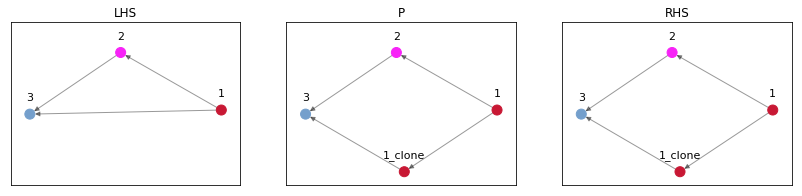

New node corresponding to the clone:  1_clone
[(1, 2), (1, '1_clone'), ('1_clone', 3), (2, 3)]


In [6]:
# Define the left-hand side of the rule
lhs = NXGraph()
lhs.add_nodes_from([1, 2, 3])
lhs.add_edges_from([(1, 2), (1, 3), (1, 1), (2, 3)])

# Define the preserved part of the rule
p = NXGraph()
p.add_nodes_from([1, "1_clone", 2, 3])
p.add_edges_from([
    (1, 2),
    (1, "1_clone"),
    ("1_clone", 3),
    (2, 3)])

p_lhs = {1: 1, "1_clone": 1, 2: 2, 3: 3}

# Initialize a rule object
rule3 = Rule(p, lhs, p_lhs=p_lhs)


plot_rule(rule3)

print("New node corresponding to the clone: ", "1_clone")
print(rule3.p.edges())